<a href="https://colab.research.google.com/github/Snowlith/Dame-Starter/blob/main/UNTDataLeadership.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from functools import reduce
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, RocCurveDisplay, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from google.colab import files

# Upload and read the dataset
uploaded = files.upload()
data = pd.read_csv('Credit_Draud.csv')

print("First few rows of the dataset:")
print(data.head())
print("\nData Cleaning and Processing:")
print("\nMissing Values Before Cleaning:")
print(data.isnull().sum())

Saving Credit_Draud.csv to Credit_Draud (1).csv
First few rows of the dataset:
   Unnamed: 0.1  Unnamed: 0 trans_date_trans_time        cc_num  \
0        232018    232018.0        9/13/2020 3:24  3.740000e+14   
1         50019     50019.0        7/7/2020 23:30  4.130000e+18   
2         45979     45979.0        7/6/2020 22:58  2.130000e+14   
3        521560     33333.0       12/24/2020 7:25  4.290000e+18   
4         29680     29680.0       6/30/2020 22:08  2.130000e+14   

                             merchant        category    amt        first  \
0  fraud_Daugherty, Pouros and Beahan    shopping_pos   3.08  Christopher   
1          fraud_Haley, Batz and Auer  health_fitness  11.36      Monique   
2      fraud_Witting, Beer and Ernser            home  33.61          Ana   
3                     fraud_Kuhic Inc     grocery_pos  92.11      Michael   
4   fraud_Mante, Luettgen and Hackett  health_fitness  35.29          Ana   

       last gender  ...      lat     long city_pop  \
0

In [ ]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

categorical_columns = data.select_dtypes(include=[object]).columns
for column in categorical_columns:
    data[column] = data[column].fillna(data[column].mode()[0])

print("\nMissing Values After Cleaning:")
print(data.isnull().sum())

print("\nData Types:")
print(data.dtypes)


Missing Values After Cleaning:
Unnamed: 0.1             0
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Data Types:
Unnamed: 0.1               int64
Unnamed: 0               float64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      obje

In [ ]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

X = data_encoded.drop(columns=['is_fraud'])
y = data_encoded['is_fraud']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)


y_train_pred = dt_classifier.predict(X_train_resampled)
y_test_pred = dt_classifier.predict(X_test)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 2)

print(f"\nTraining Set Accuracy: {train_accuracy:.4f}")
print(f"Testing Set Accuracy: {test_accuracy:.4f}")



Training Set Accuracy: 1.0000
Testing Set Accuracy: 0.9100



Confusion Matrix:
[[156  23]
 [  7 131]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91       179
           1       0.85      0.95      0.90       138

    accuracy                           0.91       317
   macro avg       0.90      0.91      0.90       317
weighted avg       0.91      0.91      0.91       317


ROC-AUC Score: 91.04%

Cross Validation Score (3-fold): 91.05%


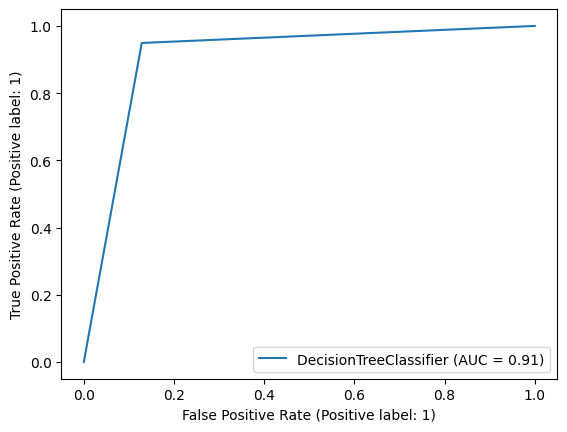

<Figure size 800x600 with 0 Axes>

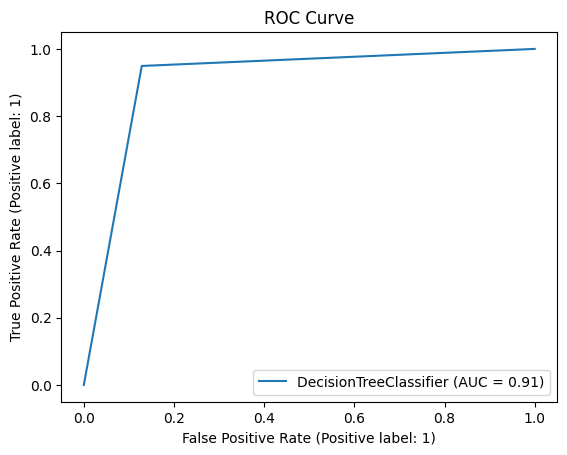

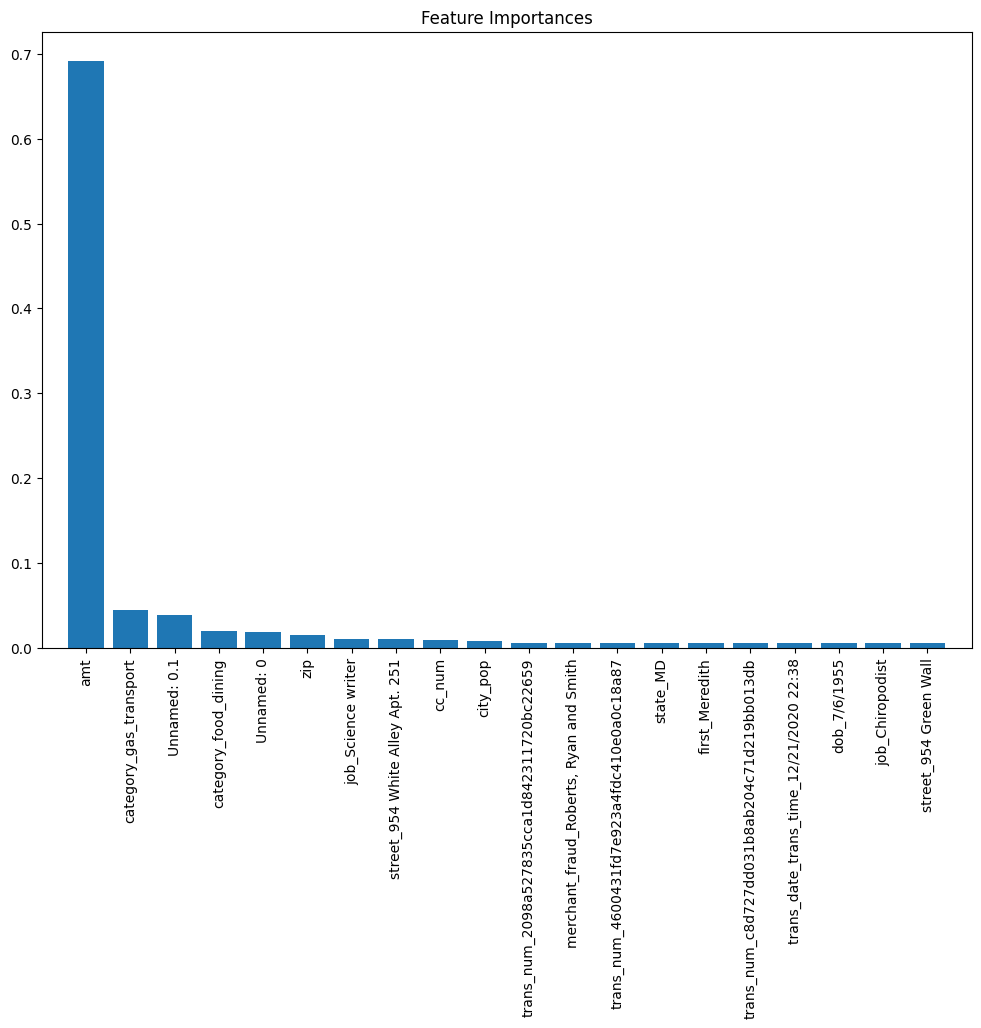

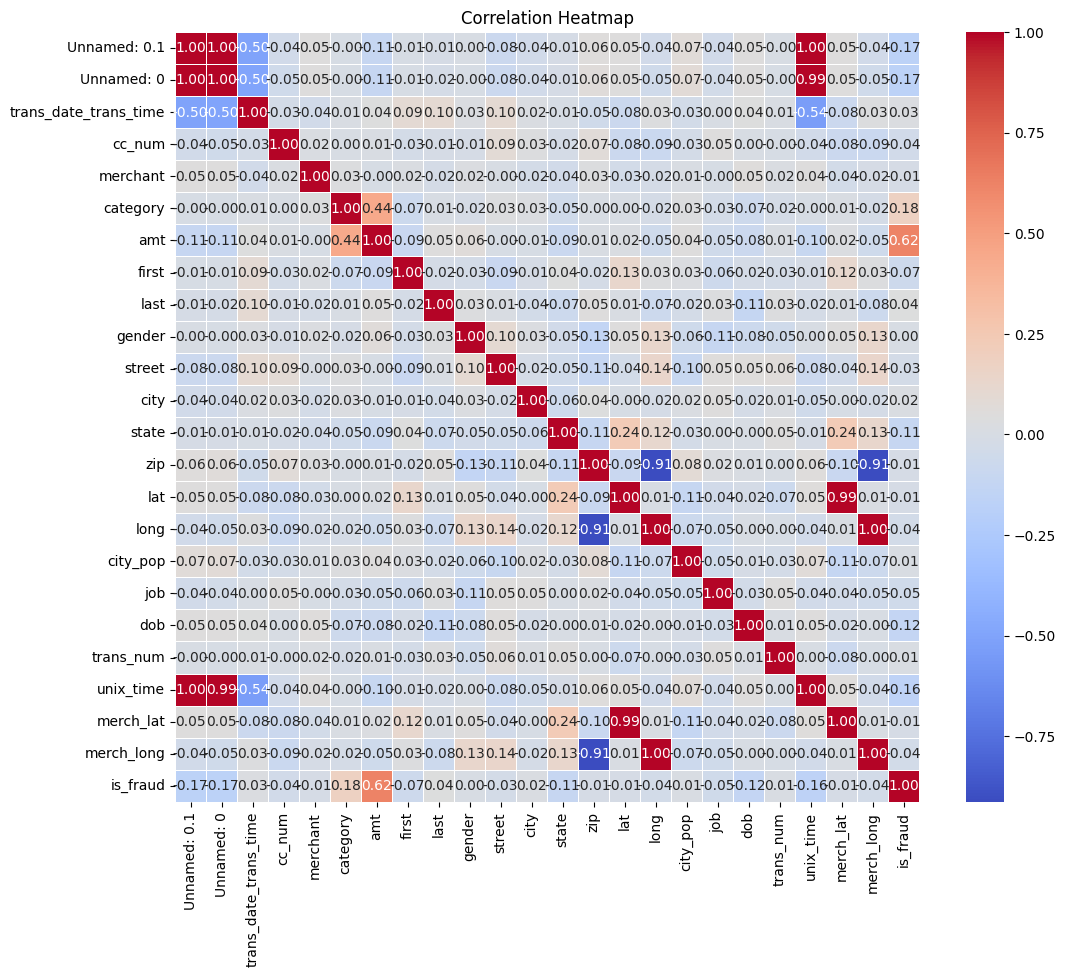

<ipython-input-12-1980f9eb7559>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amt', data=data, palette='Set2')


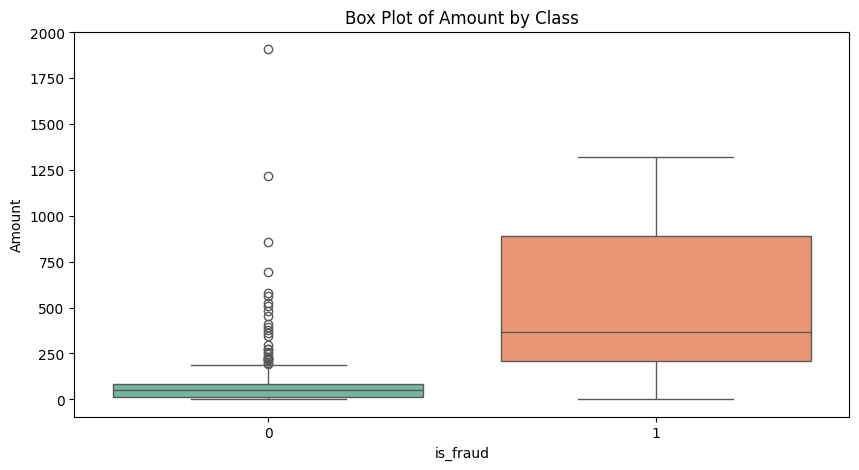

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

roc_auc = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {roc_auc:.2%}")

cross_val_score_mean = cross_val_score(dt_classifier, X_scaled, y, cv=3, scoring='roc_auc').mean()  # Reduced to 3 folds
print(f"\nCross Validation Score (3-fold): {cross_val_score_mean:.2%}")

roc_display = RocCurveDisplay.from_estimator(dt_classifier, X_test, y_test)
plt.figure(figsize=(8, 6))
roc_display.plot()
plt.title('ROC Curve')
plt.show()

importances = dt_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(min(20, X.shape[1])), importances[indices][:20], align="center")  # Show only top 20 features
plt.xticks(range(min(20, X.shape[1])), features[indices][:20], rotation=90)
plt.xlim([-1, min(20, X.shape[1])])
plt.show()

correlation_data = data.copy()
for column in categorical_columns:
    correlation_data[column] = correlation_data[column].astype('category').cat.codes
correlations = correlation_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

data['amt'] = pd.to_numeric(data['amt'], errors='coerce')
data['is_fraud'] = data['is_fraud'].astype('category')
data = data.dropna(subset=['amt'])

plt.figure(figsize=(10, 5))
sns.boxplot(x='is_fraud', y='amt', data=data, palette='Set2')
plt.xlabel('is_fraud')
plt.ylabel('Amount')
plt.title('Box Plot of Amount by Class')
plt.show()